# notebooks/exploratory_data_analysis.ipynb

In [15]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
file_path = '../data/FP-data.csv'

In [17]:
try:
    # The CSV already has a header row, so read it directly
    df = pd.read_csv(file_path, encoding='latin-1')
    # Standardize column names just in case
    df.columns = ['sentence', 'label']
    # Clean label strings (remove surrounding quotes/whitespace, lower-case)
    df['label'] = df['label'].astype(str).str.strip().str.replace('"', '').str.lower()
    print("Data successfully read!\n")
except Exception as e:
    print(f"Could not read the file: {e}")

# Show first 5 rows to verify
df.head()

Data successfully read!



,sentence,label
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  5842 non-null   object
 1   label     5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [19]:
df.describe()

,sentence,label
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


In [20]:
# Inspect unique raw labels first
print("Unique raw labels:", df['label'].unique())

# If labels are textual already (positive/negative/neutral), just normalize
expected = {"positive", "negative", "neutral"}
if set(df['label'].unique()) <= expected:
    df['label_name'] = df['label']  # already descriptive
else:
    # Fallback: try numeric mapping
    numeric_map = {0: 'neutral', 1: 'positive', 2: 'negative'}
    # Coerce to numeric when possible
    df['label_numeric'] = pd.to_numeric(df['label'], errors='coerce')
    df['label_name'] = df['label_numeric'].map(numeric_map)

# Report any unmapped labels
unmapped = df[df['label_name'].isna()]['label'].unique()
if len(unmapped):
    print("Unmapped labels found (please inspect):", unmapped)

print(df['label_name'].value_counts())

Unique raw labels: ['positive' 'negative' 'neutral']
label_name
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


/var/folders/ws/qwb72h7d5bq8gn5bnw4hw33m0000gn/T/ipykernel_26736/1107466412.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_name', data=df, palette='viridis', order=['positive', 'neutral', 'negative'])


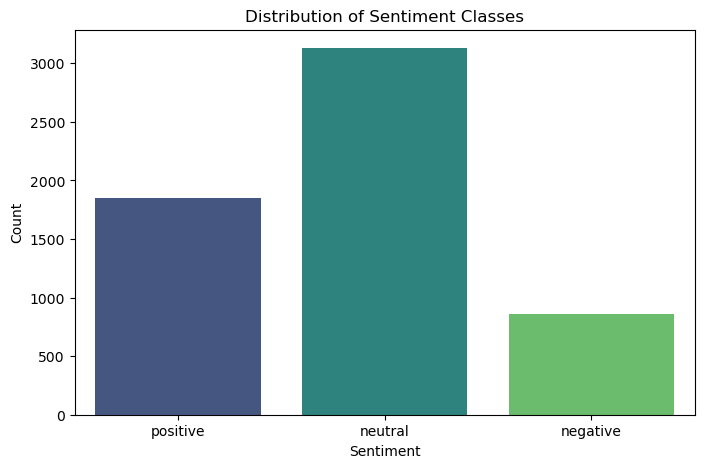

In [21]:
# Visualize the distribution with a bar plot
plt.figure(figsize=(8, 5))
sns.countplot(x='label_name', data=df, palette='viridis', order=['positive', 'neutral', 'negative'])
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

count    5842.000000
mean      117.059397
std        56.435712
min         9.000000
25%        72.000000
50%       107.000000
75%       150.000000
max       315.000000
Name: sentence_length, dtype: float64


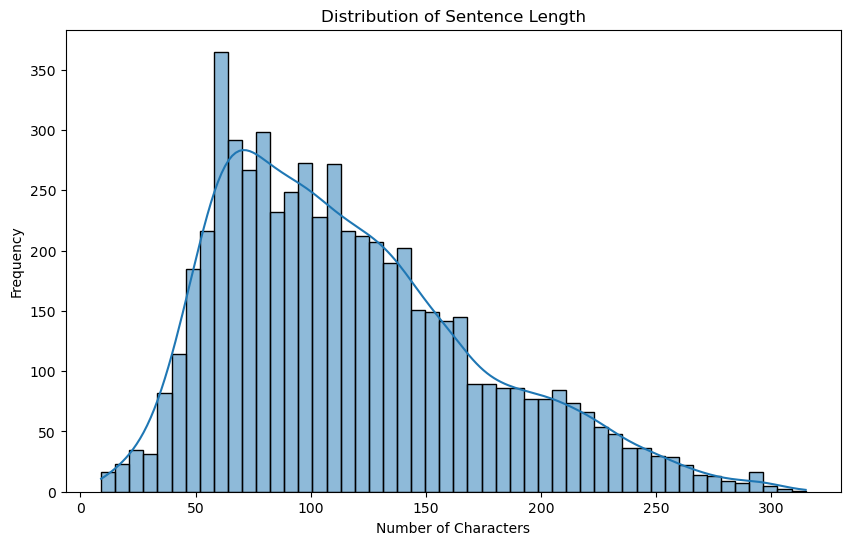

In [22]:
# Create a new column for the length of each sentence
df['sentence_length'] = df['sentence'].apply(len)

# Show statistics for the sentence lengths
print(df['sentence_length'].describe())

# Visualize the distribution of sentence lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['sentence_length'], bins=50, kde=True)
plt.title('Distribution of Sentence Length')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()